In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/csv/test.csv')

In [0]:
data = data.set_index(pd.to_datetime(data.date_time))
data.drop(columns='date_time', inplace=True)
data['dollar'] = data['price']*data['volume']
data.head()

,price,volume,buy,sell,dollar
date_time,,,,,
2018-11-21 09:00:00,266.200012,1.0,0.0,1.0,266.200012
2018-11-21 09:00:00,266.200012,1.0,0.0,1.0,266.200012
2018-11-21 09:00:00,266.250000,21.0,21.0,0.0,5591.250000
2018-11-21 09:00:00,266.299988,1.0,1.0,0.0,266.299988
2018-11-21 09:00:00,266.350006,2.0,2.0,0.0,532.700012


In [0]:
df= data.iloc[-10000:]
len(df.index)
df.head()

,price,volume,buy,sell,dollar
date_time,,,,,
2019-07-02 11:14:00,276.899994,1.0,0.0,1.0,276.899994
2019-07-02 11:14:00,276.950012,2.0,2.0,0.0,553.900024
2019-07-02 11:14:00,276.950012,2.0,2.0,0.0,553.900024
2019-07-02 11:14:00,276.950012,2.0,2.0,0.0,553.900024
2019-07-02 11:14:00,276.950012,2.0,2.0,0.0,553.900024


# 2.1.
# (a)

In [0]:
def tick_bar(df,m):
  return df.iloc[::m]

In [0]:
tb = tick_bar(df,100)
len(tb.index)

100

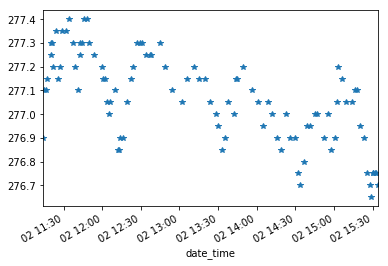

In [0]:
tb.price.plot(marker='*',ls='',label='tick bar')

In [0]:
def volume_bar(df, m):
    aux = df.reset_index()    
    idx = []
    vol_acum = []
    c_v = 0
    for i, v in aux.volume.items():
        c_v = c_v + v 
        if c_v >= m:
            idx.append(i)
            vol_acum.append(c_v)
            c_v = 0
    volume_bar = aux.loc[idx]
    volume_bar.loc[idx, 'cum_vol'] = vol_acum 
    volume_bar = volume_bar.set_index('date_time')
    return volume_bar

In [0]:
vb = volume_bar(df,600)
len(vb)


104

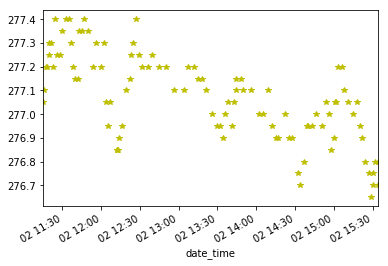

In [0]:
vb.price.plot(marker='*',ls='',c='y')

In [0]:
def dollar_bar(df, m):
    aux = df.reset_index()    
    idx = []
    d_acum = []
    c_dv = 0
    for i, dv in aux.dollar.items():
        c_dv = c_dv + dv 
        if c_dv >= m:
            idx.append(i)
            d_acum.append(c_dv)
            c_dv = 0 
    dollar_bar = aux.loc[idx]
    dollar_bar.loc[idx, 'cum_dollar_vol'] = d_acum 
    dollar_bar = dollar_bar.set_index('date_time')
    return dollar_bar


In [0]:
db = dollar_bar(df,160000)
len(db)

108

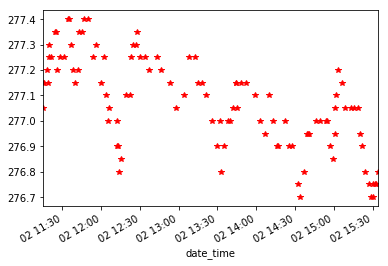

In [0]:
db.price.plot(marker='*',ls='',c='r')

In [0]:
time = df.resample('2min')

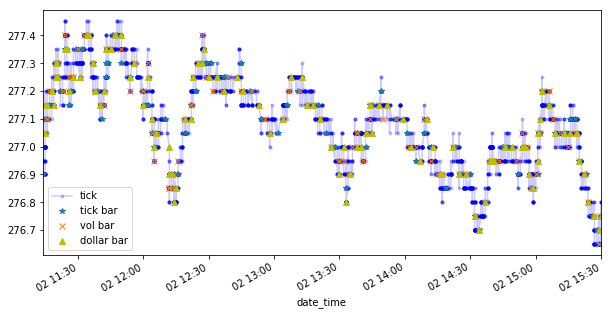

In [0]:
s_date='2019-07-02 11:00:00'
e_date='2019-07-02 15:30:00'

plt.figure(figsize=(10,5))
df.loc[s_date:e_date].price.plot(marker='o', ms=3, color='b',alpha=0.2,label='tick')


tb.loc[s_date:e_date].price.plot(marker='*',
                                      ls='',
                                      label='tick bar')
vb.loc[s_date:e_date].price.plot(marker='x',
                                     ls='',
                                     label='vol bar')
db.loc[s_date:e_date].price.plot(marker='^',
                                        ls='',
                                        color='y',
                                        label='dollar bar')
plt.legend()

In [0]:
# mlfinlab

# (b) ??why

In [0]:
tba=tick_bar(data,20)
vba=volume_bar(data,104)
dba=dollar_bar(data,28600)
len(tba), len(vba), len(dba)

(262838, 258471, 257489)

In [0]:
weekly_tick_count = tba.price.resample('1W').count()
weekly_vol_count = vba.price.resample('1W').count()
weekly_dollar_count = dba.price.resample('1W').count()

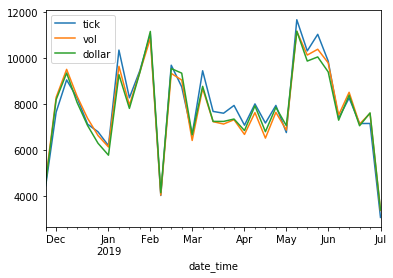

In [0]:
fig, ax = plt.subplots(1)
weekly_tick_count.plot(ax=ax)
weekly_vol_count.plot(ax=ax)
weekly_dollar_count.plot(ax=ax)
ax.legend(["tick", "vol", 'dollar'])


# (c) auto-correlation

In [0]:
tr = np.log(tba.price).diff().dropna()
vr = np.log(vba.price).diff().dropna()
dr = np.log(dba.price).diff().dropna()

In [0]:
s = '\n'
print("return autocorrelation : ", s, "tick bar: ", tr.autocorr(),s,"volume bar: " ,vr.autocorr(),s,"dollar bar: " , dr.autocorr())



return autocorrelation :  
 tick bar:  -0.04183208057119642 
 volume bar:  0.00018952357665061014 
 dollar bar:  0.001689455420604047


# (d) volatility
- monthly로 안함

In [0]:
s = '\n'
print("standard deviation : ", s, "tick bar: ", tr.std(),s,"volume bar: " ,vr.std(),s,"dollar bar: " , dr.std())

standard deviation :  
 tick bar:  0.0002182427761051778 
 volume bar:  0.00020750363749310162 
 dollar bar:  0.00020791976089854376


# (e) normality

In [0]:
from scipy.stats import jarque_bera

In [0]:
jt,_ = jarque_bera(tr)
jv,_ = jarque_bera(vr)
jd,_ = jarque_bera(dr)

In [0]:
jt

7327039313.845287

In [0]:
s = '\n'
print("jarque bera statistics : ", s, "tick bar: ", jt,s,"volume bar: " ,jv,s,"dollar bar: " , jd)

jarque bera statistics :  
 tick bar:  7327039313.845287 
 volume bar:  10696555794.246592 
 dollar bar:  10821442914.779196


# 2.2. Dollar Imbalance bar vs. Dollar bar
- serial correlation

In [2]:
!pip install -q mlfinlab

     |████████████████████████████████| 51kB 3.6MB/s 


In [0]:
import mlfinlab as ml

In [0]:
from mlfinlab import data_structures

In [0]:
data_structures.get_dollar_imbalance_bars()

In [0]:
ddd = data.drop(columns=['buy','sell','dollar'])
ddd.tail()

,price,volume
date_time,,
2019-07-02 15:34:00,276.850006,1.0
2019-07-02 15:34:00,276.799988,3.0
2019-07-02 15:34:00,276.850006,2.0
2019-07-02 15:34:00,276.850006,2.0
2019-07-02 15:34:00,276.850006,5.0


In [0]:
tib = data_structures.get_tick_imbalance_bars('/content/drive/My Drive/Colab Notebooks/csv/test2.csv',3)
vib = data_structures.get_volume_imbalance_bars('/content/drive/My Drive/Colab Notebooks/csv/test2.csv',3)
dib = data_structures.get_dollar_imbalance_bars('/content/drive/My Drive/Colab Notebooks/csv/test2.csv',3)

Reading data in batches:
Batch number: 0
Returning bars 

Reading data in batches:
Batch number: 0
Returning bars 

Reading data in batches:
Batch number: 0
Returning bars 



In [0]:
dib2 = dib.set_index(pd.to_datetime(dib.date_time))
dib2 = dib2.drop(columns='date_time')
dib3 = dib2.close

In [0]:
dib3.tail()

date_time
2019-07-02 15:20:00    277.000000
2019-07-02 15:21:00    276.950012
2019-07-02 15:24:00    276.799988
2019-07-02 15:27:00    276.750000
2019-07-02 15:29:00    276.649994
Name: close, dtype: float64

In [0]:
dibr = np.log(dib3).diff().dropna()

In [0]:
print("dollar-bar return serial correlation: ", dr.autocorr(),s,"dollar-imbalance-bar return serial correlation: ",dibr.autocorr())

dollar-bar return serial correlation:  0.001689455420604047 
 dollar-imbalance-bar return serial correlation:  0.008465894869616394


# 2.4. Bollinger Bands vs. CUSUM Filter (dollar bar)
- count 'outside the bands'
- standard deviation
- heteroscedastic

## (a)

In [0]:
n = 20
ma = dba.price.rolling(n).mean()
price_pct = 0.025
upper_band = ma + ma*price_pct
lower_band = ma - ma*price_pct
bb = pd.concat([dba.price, ma, upper_band, lower_band], axis=1).dropna()
bb.columns=['price','ma','upper_band','lower_band']
bb.tail()

,price,ma,upper_band,lower_band
date_time,,,,
2019-07-02 15:34:00,276.750000,276.742502,283.661064,269.823939
2019-07-02 15:34:00,276.750000,276.745001,283.663626,269.826376
2019-07-02 15:34:00,276.750000,276.747501,283.666188,269.828813
2019-07-02 15:34:00,276.700012,276.747501,283.666188,269.828813
2019-07-02 15:34:00,276.799988,276.750000,283.668750,269.831250


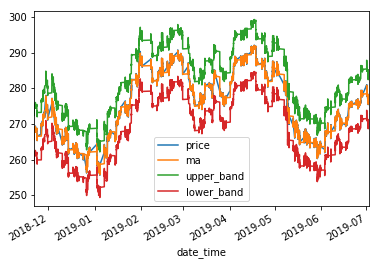

In [0]:
bb.plot()

In [0]:
np.any(bb.price > bb.upper_band),
np.any(bb.price < bb.lower_band)

False

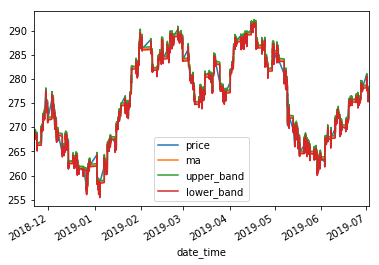

In [0]:
n = 20
ma = dba.price.rolling(n).mean()
price_pct = 0.001
upper_band = ma + ma*price_pct
lower_band = ma - ma*price_pct
bb = pd.concat([dba.price, ma, upper_band, lower_band], axis=1).dropna()
bb.columns=['price','ma','upper_band','lower_band']
bb.plot()

In [0]:
len(bb[bb.price > bb.upper_band]) + len(bb[bb.price < bb.lower_band])

4635

## (b)

In [0]:
from mlfinlab import filters
filters.cusum_filter(dba.price, 0.05)

TypeError: ignored

In [0]:
def getTEvents(gRaw,h):
  tEvents,sPos,sNeg=[],0,0
  
  diff=gRaw.diff()
  for i in diff.index[1:]:
    sPos,sNeg=max(0,sPos+diff.loc[i]),min(0,sNeg+diff.loc[i])
    if sNeg<-h:
      sNeg=0;tEvents.append(i)
    elif sPos>h:
      sPos=0;tEvents.append(i)
  
  return tEvents

In [0]:
rawraw = dba[['price']].reset_index()
rawraw.head()

,date_time,price
0,2018-11-21 09:00:00,266.100006
1,2018-11-21 09:00:00,266.200012
2,2018-11-21 09:00:00,266.100006
3,2018-11-21 09:00:00,266.149994
4,2018-11-21 09:00:00,266.299988


In [0]:
t_events = getTEvents(rawraw.price, 0.05)

In [0]:
len(t_events)

80971

In [0]:
len(rawraw)

257489

## (c)

In [0]:
up = bb[bb.price > bb.upper_band].price

In [0]:
down = bb[bb.price < bb.lower_band].price

In [0]:
##bb_sampled = pd.concat([up,down],)

In [0]:
cusum_sampled = rawraw.iloc[t_events][['price']]
cusum_sampled.reset_index(inplace=True, drop=True)
cusum_sampled

,price
0,266.200012
1,266.100006
2,266.299988
3,266.350006
4,266.299988
5,266.350006
6,266.299988
7,266.399994
8,266.250000
9,266.350006


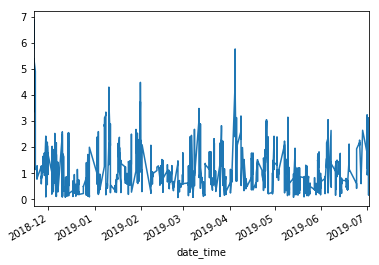

In [0]:
bb_sampled.rolling(20).std().dropna().plot()

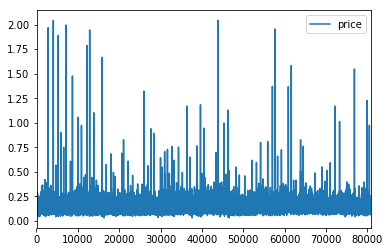

In [0]:

cusum_sampled.rolling(20).std().dropna().plot()